14513.380252198953 0.008155975296668444
14513.380252198953 0.008155975296668444
23733.901659210256 0.004474353589031614
43951.66973927788 0.004474353589031614
43951.66973927788 0.004474353589031614
23733.901659210256 0.004474353589031614
12866.06519271778 0.007211927899238053
15754.106481410981 0.0076621092015081394
17037.49223310507 0.005550483007425925
39902.65355808918 0.004910381678005941
39879.72334485956 0.004290435504196944
33397.07457979038 0.0034222541436378126
11350.032306436518 0.007662109201508098
18892.292449255463 0.007211927899238074
11305.751841458843 0.004910381678005971
27628.365783413636 0.0055504830074258665
78581.35195244598 0.0034222541436378564
36888.74409399786 0.004290435504196869


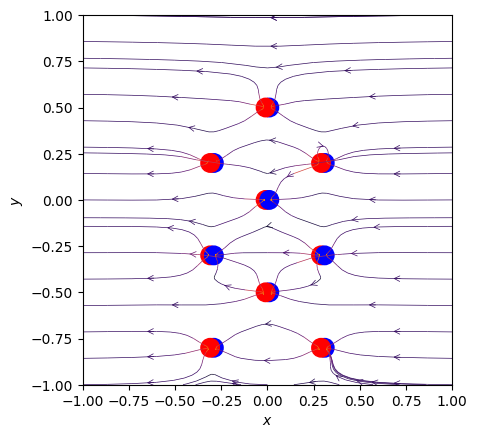

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Calculation of the electric field by a single charge
#
#	We know that E(r) \propto q * \vec{r}/r^3


def EFieldSingleCharge(q, r0, x, y):
  distance = np.hypot(x - r0[0], y - r0[1])
  ret = q * (x - r0[0]) / (distance**3), q * (y - r0[1]) / (distance**3)
  # 有除零的风险，但是因浮点数避免了取到 0
  print(np.amax(ret), np.amin(distance))
  return ret

# We create two linear arrays with 64 points in the range [-2,2]

nx = 128
ny = 128
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

# And then we use meshgrid that creates an array of coordinates for X and Y

X, Y = np.meshgrid(x,y)

# Our charges array contains the charge carriers

charges = []

# We simply add all charges that we want ...

# charges.append((1, (-0.05, 0)))
# charges.append((-1, (0.05, 0)))

# charges.append((-1, (0.05, -0.5)))
# charges.append((1, (-0.05, -0.5)))

# charges.append((-1, (0.05, 0.5)))
# charges.append((1, (-0.05, 0.5)))

alpha = 0.02
offset = -0.3

charges.append((1, (-0.5 * alpha, 0)))
charges.append((-1, (0.5 * alpha, 0)))

charges.append((-1, (0.5 * alpha, -0.5)))
charges.append((1, (-0.5 * alpha, -0.5)))

charges.append((-1, (0.5 * alpha, 0.5)))
charges.append((1, (-0.5 * alpha, 0.5)))

charges.append((1, (-0.5 * alpha - offset, 0 + offset)))
charges.append((-1, (0.5 * alpha - offset, 0 + offset)))

charges.append((-1, (0.5 * alpha - offset, -0.5 + offset)))
charges.append((1, (-0.5 * alpha - offset, -0.5 + offset)))

charges.append((-1, (0.5 * alpha - offset, 0.5 + offset)))
charges.append((1, (-0.5 * alpha - offset, 0.5 + offset)))


charges.append((1, (-0.5 * alpha + offset, 0 + offset)))
charges.append((-1, (0.5 * alpha + offset, 0 + offset)))

charges.append((-1, (0.5 * alpha + offset, -0.5 + offset)))
charges.append((1, (-0.5 * alpha + offset, -0.5 + offset)))

charges.append((-1, (0.5 * alpha + offset, 0.5 + offset)))
charges.append((1, (-0.5 * alpha + offset, 0.5 + offset)))



# Initialize our field components to be zero

Ex = np.zeros((ny, nx)) - 10
Ey = np.zeros((ny, nx))



# And iterate over charges. Since we apply superposition principle we can
# calculate the field created by each charge separatly and add up all fields in
# the field vectors

for charge in charges:
  ex, ey = EFieldSingleCharge(*charge, x=X, y=Y)
  Ex += ex
  Ey += ey
# Create a subplot

fig = plt.figure()
splot = fig.add_subplot(111)

# Color is determined by the magnitude of the field

color = np.log(np.hypot(Ex, Ey))

# Perform a plot of the vector arrows using streamplot

streamplotSet  = splot.streamplot(x,y,Ex, Ey, color=color, linewidth=0.5, cmap=plt.cm.inferno, density = 0.5, arrowstyle='->', arrowsize=1, broken_streamlines=False)

print(streamplotSet.lines)
# Add circles for positive and negative charges

qColors = {
  True : '#FF0000',
  False : '#0000FF'
}
for q, pos in charges:
  splot.add_artist(Circle(pos, 0.05, color=qColors[q>0]))

# Set labels and areas

splot.set_xlabel('$x$')
splot.set_ylabel('$y$')
splot.set_xlim(-1,1)
splot.set_ylim(-1,1)
splot.set_aspect('equal')

# Done

plt.show()
